In [183]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

Now, having the predictions .csv file containing the features values ​​as a vector in a single column,
 we will have to fix the file

In [184]:

df = pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalPrediction.csv", 
                  usecols=['Indipendent Features','prediction'])

column_names= ["Indipendent Features",
               "absolute_humidity", 
               "device_temperature", 
               "dew_point", 
               "pressure",
               "relative_humidity", 
               "Month", 
               "Day", 
               "prediction"]

df = df.reindex(columns = column_names)   

df=df.rename(columns = {'Indipendent Features':'Indipendent_Features'})
df.head()

,Indipendent_Features,absolute_humidity,device_temperature,dew_point,pressure,relative_humidity,Month,Day,prediction
0,"[6.0,5.0,4.0,102994.0,33.0,2.0,15.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.075425
1,"[6.0,5.0,4.0,102995.0,33.0,2.0,15.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.075425
2,"[6.0,5.0,4.0,102999.0,33.0,2.0,15.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.075425
3,"[6.2,4.0,4.4,103100.0,35.0,2.0,25.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.620551
4,"[6.2,5.0,4.4,102997.0,34.0,2.0,15.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.104759



Now let's transform the features from string to array in order to better format the DataFrame

In [185]:
from ast import literal_eval

for (i,values) in enumerate(df.Indipendent_Features):
    array = literal_eval(values)
    df.absolute_humidity[i] = array[0]
    df.device_temperature[i] = array[1]
    df.dew_point[i] = array[2]
    df.pressure[i] = array[3]
    df.relative_humidity[i] = array[4]
    df.Month[i] = array[5]
    df.Day[i] = array[6]


In [186]:
df.drop(['Indipendent_Features'], 1, inplace=True)
df

,absolute_humidity,device_temperature,dew_point,pressure,relative_humidity,Month,Day,prediction
0,6.0,5.0,4.0,102994.0,33.0,2.0,15.0,21.075425
1,6.0,5.0,4.0,102995.0,33.0,2.0,15.0,21.075425
2,6.0,5.0,4.0,102999.0,33.0,2.0,15.0,21.075425
3,6.2,4.0,4.4,103100.0,35.0,2.0,25.0,20.620551
4,6.2,5.0,4.4,102997.0,34.0,2.0,15.0,21.104759
...,...,...,...,...,...,...,...,...
11830,11.6,6.0,13.9,101212.0,56.0,4.0,26.0,23.006385
11831,11.6,6.0,13.9,101213.0,56.0,4.0,26.0,23.006385
11832,11.6,6.0,13.9,101214.0,56.0,4.0,26.0,23.006385
11833,11.6,7.0,13.9,100958.0,54.0,4.0,12.0,23.614534


Let's save the .csv file with the temperature prediction 

In [188]:
df = df.astype({"Month": int, "Day": int})
df.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalPrediction.csv", index=None)


Finally, this is a comparison of the average temperatures of the 3 months compared. Obviously in the estimated months there is an increase in temperature as summer is coming.

In [181]:
import numpy
import calendar
from time import strptime
df = pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmental.csv")
df['srtDate'] = pd.to_datetime(df.srtDate, dayfirst=True, utc=True)
df['Month'] = df['srtDate'].dt.month.apply(lambda x: calendar.month_abbr[x])
df.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalSRT.csv")

df2 = pd.read_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalPrediction.csv")
df2['Month'] = df2['Month'].apply(lambda x: calendar.month_abbr[x])
df2.to_csv("../Ivan Compagnucci/EDA-EnterpriseDataAnalytics-project/Data/Prediction data/environmentalPrediction.csv")


TypeError: list indices must be integers or slices, not str

Text(0, 0.5, 'Temperature')

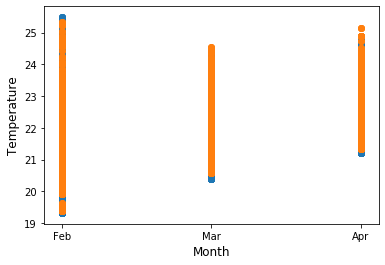

In [182]:
plt.scatter(x=df['Month'], y=df['environmental_temperature'], label='Environmental temperatures knowed')
plt.scatter(x=df2['Month'], y=df2['prediction'], label='Environmental temperatures predicted')
plt.xlabel('Month', size=12)  
plt.ylabel('Temperature', size=12) 
